# Solving Linear Programming using cvxpy

Here, we use the library, **cvxpy** to find the solution of the linear programming problem (LPP).

To install this library, use the following command:

In [1]:
!pip install cvxpy


In [2]:
import cvxpy as cp
import numpy as np

## EXAMPLE 1

# Problem

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=x_1+x_2 \\
\text{subject to } & 4x_1+3x_2 \leq 12\\
& -3x_1+4x_2\leq 12 \\
& 0\leq x_1,\ x_2 \leq 2\end{matrix}$$

The expected solution is $z=3.5$ where $x_1=1.5,\ x_2=2$.

## CODE

# Step 1: First define the number of variables that would be used

For example, if only two $x_is$ would be used,

This line creates a column matrix of dimensions $2\times 1$ (in a general case, if $n$ is the number of linear programming variables, then a column matrix of dimensions $n \times 1$ should be made.)

In [3]:
x = cp.Variable(shape=(2,1), name="x")

# Step 2: Define the constraints

Here the constraints are as follows
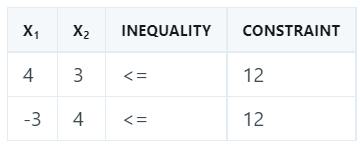

All values of x lie between 0 and 2 both inclusive.

In [4]:
A = np.array([[4,3],[-3,4]])
constraints = [cp.matmul(A, x) <= 12, x<=2, x>=0]

The above lines first make a $2 \times 2$ matrix (as described in the table above). Since both of their constraints are the same, we can define the constraint in a single line, by making the matrix $<= 12$.

Multiple constraints on both the variables can be defined using $x$ as a general variable.

For defining multiple single lined distinct constraints, use the following format:
$$A x <= B$$

Where $<=$ can be replaced by any other inequality symbol.

Here A is a square matrix of dimensions $n \times n$ where n is the number of varibles in the linear programming problem, x is as defined in the previous step, and B is a column matrix of dimensions $n \times 1$.

For example, for defining the following constraints, use the following snippet: ($n = 3$)
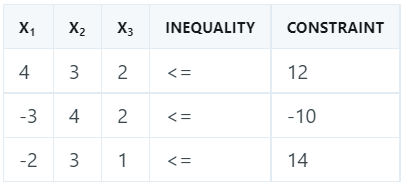

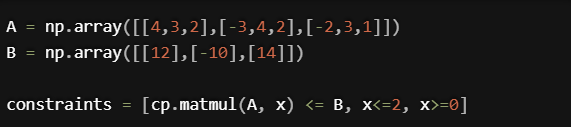

# Step 3: Define the objective function

Here the objective function is $z = x_1 + x_2$.

In [5]:
objective = cp.Maximize(cp.sum(x, axis=0))

For an objective function $z = 3x_1 + 4x_2$, define a new 1 dimensional array containing the different parameters in the objective function as follows:

In [6]:
r = np.array([3,4])
objective = cp.Maximize(cp.matmul(r, x))

# Step 4: Define the problem and then solve it

The problem is defined by the objective function and the constraints.

In [7]:
problem = cp.Problem(objective, constraints)
solution = problem.solve()


# Step 5: Print the maximised objective funstion, and the x values

Here, solution contains the value of the objective function, and x.value is the column matrix, containing the values of $x_i$.

In [8]:
print(solution)
print(x.value)


12.499999998792216
[[1.5]
 [2. ]]


# Final code

In [9]:
import cvxpy as cp
import numpy as np

x = cp.Variable(shape=(2,1), name="x")
A = np.array([[4,3],[-3,4]])

constraints = [cp.matmul(A, x) <= 12, x<=2, x>=0]
objective = cp.Maximize(cp.sum(x, axis=0))
problem = cp.Problem(objective, constraints)

solution = problem.solve()
print(solution)
print(x.value)


3.4999999941204103
[[1.50000002]
 [1.99999998]]


Here the first line denotes the solution while the next two lines denote the values of the two parameters.



In [10]:
import cvxpy as cp

# Tạo biến
x = cp.Variable(2, nonneg=True)  # [x1, x2] với x >= 0

# Hàm mục tiêu
objective = cp.Maximize(x[0] + x[1])

# Các ràng buộc
constraints = [
    4*x[0] + 3*x[1] <= 12,
    -3*x[0] + 4*x[1] <= 12,
    x[0] <= 2,
    x[1] <= 2
]

# Định nghĩa bài toán
prob = cp.Problem(objective, constraints)

# Giải bài toán
result = prob.solve()

print("Giá trị tối ưu z* =", result)
print("x1* =", x[0].value)
print("x2* =", x[1].value)


Giá trị tối ưu z* = 3.4999999941204107
x1* = 1.500000015193341
x2* = 1.9999999789270695


# EXAMPLE 2

# Problem

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=4x_1+2x_2 \\ 
\text{subject to} & 4x_1+3x_2 \leq 12 \\
& -3x_1 + 6x_2 \leq 10 \\
& x_1 \geq 1\\
& 0\leq x_1,\ \ x_2 \leq 5\end{matrix}$$

The expected solution is $z=4.0$ where $x_1=1,\ x_2=0$.

In [16]:
x = cp.Variable(name = "x")
y = cp.Variable(name = "y")
cons = [4*x + 3*y <= 12,
        -3*x + 6*y <= 10,
        x >= 1, x <= 5, y >= 0, y <= 5]
ob = cp.Minimize(4*x + 2*y)
prob = cp.Problem(ob, cons)
solu = prob.solve()
print(solu)
print(x.value)
print(y.value)

4.000000000181324
1.0000000000324814
2.5699416563289484e-11


# EXAMPLE 3


Solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x,\ y} & z=x+2y \\ 
\text{subject to} & 2x+y \leq 20 \\
& 4x - 5y \geq -10 \\
& -x+2y \geq -2\\
& x,\ y \geq 0\end{matrix}$$

In [18]:
# TO DO
x = cp.Variable(name = "x")
y = cp.Variable(name = "y")
cons = [2*x + y <= 20, 
        4*x - 5*y >= -10, 
        -1*x + 2*y >= -2, 
        x >=0, y >= 0]
ob = cp.Maximize(x + 2*y)
pob = cp.Problem(ob, cons)
solu = pob.solve()
print(solu)
print(x.value)
print(y.value)


20.714285707115444
6.4285714261477
7.142857140483871


In [17]:
# lpp_solve_cvxpy.py
# Giải LPP:
#   minimize z = x + 2y
#   s.t. 2x + y <= 20
#        4x - 5y >= -10
#        -x + 2y >= -2
#        x, y >= 0

import cvxpy as cp

def main():
    # Biến quyết định (không âm)
    x = cp.Variable(nonneg=True, name="x")
    y = cp.Variable(nonneg=True, name="y")

    # Hàm mục tiêu
    objective = cp.Minimize(x + 2*y)

    # Ràng buộc
    constraints = [
        2*x + y <= 20,
        4*x - 5*y >= -10,
        -x + 2*y >= -2,
        x >= 0,
        y >= 0
    ]

    # Bài toán
    prob = cp.Problem(objective, constraints)

    # Giải (để mặc định cho cvxpy chọn solver phù hợp)
    opt_val = prob.solve()

    print("Trạng thái:", prob.status)
    print(f"Giá trị tối ưu z* = {opt_val:.6f}")
    print(f"x* = {x.value:.6f}")
    print(f"y* = {y.value:.6f}")

if __name__ == "__main__":
    main()


Trạng thái: optimal
Giá trị tối ưu z* = 0.000000
x* = 0.000000
y* = 0.000000


# Example 4

Solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x,\ y} & z=40x+90y \\ 
\text{subject to} & 9x+7y \leq 56 \\
& 7x + 20y \geq 70 \\
& x,\ y \geq 0\end{matrix}$$

# Exercise:
Using cvxpy to solve **Example 2, 3, and 4**.

# Bai tap

Optimal: 1.2499999996679705
x* = 45.000000000157975 y* = 6.249999999509994


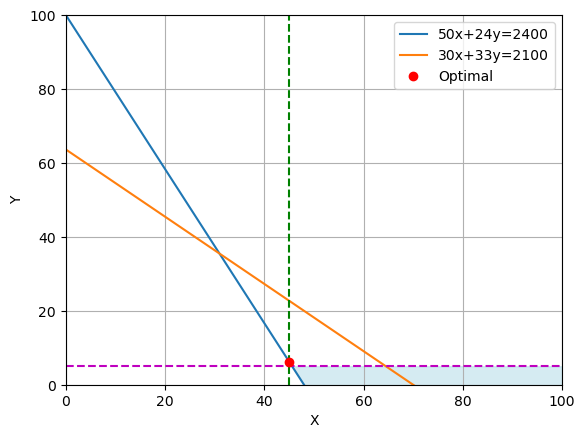

In [38]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Biến và ràng buộc
x, y = cp.Variable(), cp.Variable()
cons = [50*x + 24*y <= 2400,
        30*x + 33*y <= 2100,
        x >= 45, y >= 5]
prob = cp.Problem(cp.Maximize(x+y-50), cons)
prob.solve()

print("Optimal:", prob.value)
print("x* =", x.value, "y* =", y.value)

# Đồ thị
X = np.linspace(0, 100, 400)
plt.plot(X, (2400-50*X)/24, label="50x+24y=2400")
plt.plot(X, (2100-30*X)/33, label="30x+33y=2100")
plt.axvline(45, color="g", ls="--")
plt.axhline(5, color="m", ls="--")
plt.plot(x.value, y.value, "ro", label="Optimal")

plt.fill_between(X, 5, np.minimum((2400-50*X)/24, (2100-30*X)/33),
                 where=(X>=45), color="lightblue", alpha=0.5)

plt.xlim(0, 100); plt.ylim(0, 100)
plt.xlabel("X"); plt.ylabel("Y")
plt.legend(); plt.grid(True); plt.show()


In [33]:
## Bai 2
from math import *
def mu(data = [], p = 0):
    s = []
    s.append(data[0])
    for i in range(1, len(data)):
        tmp = p * data[i] + (1-p) * s[i-1]
        s.append(tmp)
    return floor(s[-1])
data1 = [23, 27, 34, 40]
data2 = [11, 13, 15, 14]
t1 = mu(data1, 0.7)
t2 = mu(data2, 0.7)

x = cp.Variable(name = "x")
y = cp.Variable(name = "y")
cons = [x*15 + y*7 <= 20*60, 
        25*x + 45*y <= 15*60,
        x >= 0, y >= 0, x <= t1, y <= t2]
ob = cp.Maximize(x*10 + y*4 - 3 * (t1 - x) - (t2-y))
prob = cp.Problem(ob, cons)
solu = prob.solve()
print(solu)
print(x.value)
print(y.value)



342.9999998731469
35.99999998685704
8.801074845465815e-09


In [47]:
x = cp.Variable(name = "x")
y = cp.Variable(name = "y")
cons = [12*x + 25*y <= 30*60, 
        x >= 0, y >= 0,
        y - 2/5*x >= 0]
ob = cp.Maximize(3*x + 5*y)
prob = cp.Problem(ob, cons)
solu = prob.solve()
print(solu)
print(x.value)
print(y.value)

409.0909080582661
81.81818095601999
32.727273038041226


In [49]:
a = cp.Variable(name = "a")
b = cp.Variable(name = "b")
c = cp.Variable(name = "c")
cons = [a + b >= 11,
        a - b <= 5, 
        c-a-b == 0, 
        7*a-35+12*b >= 0,
        a >= 0, b>=0, c>= 0]
ob = cp.Minimize(4*a + 5*b +6*c)
prob = cp.Problem(ob, cons)
solu = prob.solve()
print(solu)
print(a.value)
print(b.value)
print(c.value)

112.99999999285917
7.999999994517987
3.000000004334483
10.99999999885247


In [51]:
x = cp.Variable(name = "x")
y = cp.Variable(name = "y")
cons = [6*x + 3*y <= 40, y-3*x >= 0, y/4 + x <= 4]
ob =  cp.Maximize(30*x + 10*y)
prob = cp.Problem(ob, cons)
solu = prob.solve()
print(solu)
print(x.value)
print(y.value)

146.66666740455358
1.333333353092665
10.666666681177363


Trạng thái: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Sản xuất X = 45.00, Y = 6.25
Tồn kho cuối kỳ = 1.25


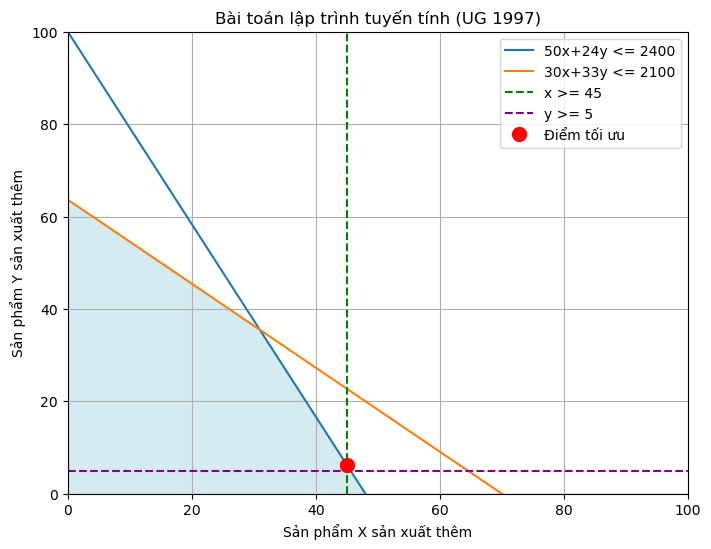